In [1]:
import sqlalchemy
import os 
import pandas as pd
from binance.client import Client
from binance import BinanceSocketManager

In [2]:
api_key = os.environ.get("api_key")
api_secret = os.environ.get("api_secret")

In [3]:
client = Client(api_key, api_secret)

In [4]:
engine = sqlalchemy.create_engine('sqlite:///BTCUSDTstream.db')

In [5]:
df = pd.read_sql('BTCUSDT', engine)

In [6]:
df

,symbol,Time,Price
0,BTCUSDT,2021-10-03 20:10:07.086,48787.42
1,BTCUSDT,2021-10-03 20:10:07.334,48787.42
2,BTCUSDT,2021-10-03 20:10:07.384,48787.42
3,BTCUSDT,2021-10-03 20:10:08.019,48787.42
4,BTCUSDT,2021-10-03 20:10:08.084,48787.43
...,...,...,...
432,BTCUSDT,2021-10-03 21:59:52.788,47761.91
433,BTCUSDT,2021-10-03 21:59:52.833,47761.91
434,BTCUSDT,2021-10-03 21:59:52.888,47761.91
435,BTCUSDT,2021-10-03 21:59:52.934,47761.91


<AxesSubplot:>

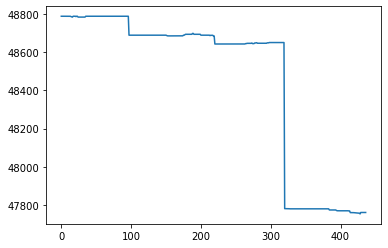

In [7]:
df.Price.plot()

In [8]:
# Trendfollowing Strategy
# if the crypto was rising by x % -> Buy
# exit when profit is above 0.15% or loss is crossing -0.15%

In [9]:
# # Entry is asset, lookback period is how much time we want to go back, qty, boolean for open position
# def strategy(entry, lookback, qty, open_position=False):
#     while True:
#         df = pd.read_sql('BTCUSDT', engine)
#         lookbackperiod = df.iloc[-lookback:]
#         cumret = (lookbackperiod.Price.pct_change() +1).cumprod() - 1
#         if not open_position:
#             if cumret[cumret.last_valid_index()] > entry:
#                 order = client.create_order(symbol='BTCUSDT',
#                                            side='BUY',
#                                            type='MARKET',
#                                            quantity=qty)
#                 print(order)
#                 open_position = True
#                 break
#     if open_position:
#         while True:
#             df = pd.read_sql('BTCUSDT', engine)
#             sincebuy = df.loc[df.Time > 
#                               pd.to_datetime(order['transactTime'], unit='ms')]
#             if len(sincebuy) > 1:
#                 sincebuyret = (sincebuy.Price.pct_change() +1).cumprod() - 1 
#                 last_entry = sincebuyret[sincebuyret.last_valid_index()]
#                 if last_entry > 0.0015 or last_entry < -0.0015:
#                     order = client.create_order(symbol='BTCUSDT',
#                                            side='BUY',
#                                            type='MARKET',
#                                            quantity=qty)
#                     print(order)
#                     break
#